## Summary of resulting considerations
- Why do we have only 1806 rows in the dataset with the numerical features (feature_data_1-6.csv) while we have a total of 2756 rows in data_output.csv?
- Why do we nonetheless have PDB codes that are present in feature_data_1-6.csv but not in data_output.csv?
- The features turn out to be all statistically significant, but some features are highly correlated.

## Imports

In [56]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data

In [57]:
data = pd.read_csv("../feature_data_1-6.csv")
data = data.sort_values(by='PDB code 1')
for i in range(0,1765,42):
    chunk = data.iloc[i:i+42,:]
    chunk = chunk.sort_values(by='PDB code 2')
    data.iloc[i:i+42,:] = chunk

data = data.reset_index(drop=True)
data

,PDB code 1,VDWAALS 1,EEL 1,EGB 1,ESURF 1,GGAS 1,GSOLV 1,TOTAL 1,PDB code 2,VDWAALS 2,EEL 2,EGB 2,ESURF 2,GGAS 2,GSOLV 2,TOTAL 2
0,1exd,-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,1il2,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87
1,1exd,-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,1je8,-309.02,-25367.65,25386.51,-44.66,-25676.67,25341.85,-334.82
2,1exd,-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,1omh,-270.05,-5246.08,5238.97,-34.09,-5516.13,5204.88,-311.25
3,1exd,-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,1osb,-563.32,-11193.39,11154.77,-72.18,-11756.71,11082.59,-674.11
4,1exd,-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,1rkj,-119.28,-801.67,834.16,-15.17,-920.95,818.99,-101.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5wzk,-176.42,735.87,-706.76,-21.41,559.45,-728.16,-168.71
1802,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5yts,-57.48,-136.57,171.71,-7.00,-194.05,164.71,-29.34
1803,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5ytt,-75.96,-273.93,314.46,-8.79,-349.88,305.67,-44.22
1804,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5ytv,-45.47,-179.99,205.21,-5.59,-225.46,199.61,-25.84


In [58]:
print(len(np.unique(data.iloc[:,0]))) #number of different pdb code 1s

43


In [59]:
KD_data = pd.read_csv("../KD_data.csv")
KD_data.columns = KD_data.iloc[0]
KD_data.drop(index = 0,inplace=True)
KD_data = KD_data[['PDB code','Protein Name','Ligand Name','Affinity Data']]

def translate_kd(kd):
    kd.strip()
    kd = kd[3:]
    factor = 0
    if "nM" in kd:
        factor = 1
    elif "pM" in kd:
        factor = .001
    elif "uM" in kd:
        factor = 1000
    kd = kd[:-2]
    try:
        return float(kd) * factor
    except:
        return None

KD_data["kd value (nM)"] = [translate_kd(kd) for kd in KD_data["Affinity Data"]]
df_compare = pd.read_csv("../Aptamer-Protein-Information.csv")
KD_data = KD_data[KD_data["PDB code"].isin(df_compare["Unnamed: 0"])]
KD_data.head()

,PDB code,Protein Name,Ligand Name,Affinity Data,kd value (nM)
14,1exd,GLUTAMINYL-TRNA SYNTHETASE,GLUTAMINE TRNA APTAMER,Kd=7.1nM,7.10
35,1il2,ASPARTYL-TRNA SYNTHETASE,ASPARTYL TRANSFER RNA,Kd=3uM,3000.00
42,1jbr,Ribotoxin Restrictocin and a 31-mer SRD RNA In...,RNA,Kd=1uM,1000.00
43,1je8,Nitrate/Nitrite Response Regulator Protein NARL,DNA,Kd=0.15nM,0.15
58,1knz,Nonstructural RNA-binding Protein 34,RNA,Kd=79nM,79.00


In [60]:
labels = pd.read_csv("../data_output.csv")
print(labels.shape)
labels.head()

(2756, 11)


,PDB code 1,Protein Name 1,Ligand Name 1,Affinity Data 1,kd value (nM) 1,PDB code 2,Protein Name 2,Ligand Name 2,Affinity Data 2,kd value (nM) 2,Output
0,1exd,GLUTAMINYL-TRNA SYNTHETASE,GLUTAMINE TRNA APTAMER,Kd=7.1nM,7.1,1il2,ASPARTYL-TRNA SYNTHETASE,ASPARTYL TRANSFER RNA,Kd=3uM,3000.00,1
1,1exd,GLUTAMINYL-TRNA SYNTHETASE,GLUTAMINE TRNA APTAMER,Kd=7.1nM,7.1,1jbr,Ribotoxin Restrictocin and a 31-mer SRD RNA In...,RNA,Kd=1uM,1000.00,1
2,1exd,GLUTAMINYL-TRNA SYNTHETASE,GLUTAMINE TRNA APTAMER,Kd=7.1nM,7.1,1je8,Nitrate/Nitrite Response Regulator Protein NARL,DNA,Kd=0.15nM,0.15,0
3,1exd,GLUTAMINYL-TRNA SYNTHETASE,GLUTAMINE TRNA APTAMER,Kd=7.1nM,7.1,1knz,Nonstructural RNA-binding Protein 34,RNA,Kd=79nM,79.00,1
4,1exd,GLUTAMINYL-TRNA SYNTHETASE,GLUTAMINE TRNA APTAMER,Kd=7.1nM,7.1,1omh,trwC protein,DNA OLIGONUCLEOTIDE,Kd=70nM,70.00,1


In [87]:
labels[labels['PDB code 1']=='2gkd'] #not present among the made comparisons.

,PDB code 1,Protein Name 1,Ligand Name 1,Affinity Data 1,kd value (nM) 1,PDB code 2,Protein Name 2,Ligand Name 2,Affinity Data 2,kd value (nM) 2,Output


In [62]:
output = -2 * np.ones(len(data), dtype=int)
data['Output'] = output

for i in range(len(data)):
    if i % 42 == 0:
        pdbcode_one = data.iloc[i,0]
        matching_indeces = np.where(labels.iloc[:,0]==pdbcode_one)[0]
        if len(matching_indeces)==0:
            nocomparisonpossible1 = np.where(data.iloc[:,0]==pdbcode_one)[0]
            nocomparisonpossible2 = np.where(data.iloc[:,8]==pdbcode_one)[0]
            data.iloc[nocomparisonpossible1,-1] = -1
            data.iloc[nocomparisonpossible2, -1] = -1
            continue
        else:
            first_matching_index = matching_indeces[0]
            last_matching_index = matching_indeces[-1]
    if data.iloc[i,-1] == -1:
        continue
    for j in range(first_matching_index, last_matching_index+1):
        if data.iloc[i,0] == labels.iloc[j,0] and data.iloc[i,8] == labels.iloc[j,5]:
            data.iloc[i,-1] = labels.iloc[j,-1]


In [78]:
data.iloc[42:,:][data.iloc[42:,:]['Output']==-1]

,PDB code 1,VDWAALS 1,EEL 1,EGB 1,ESURF 1,GGAS 1,GSOLV 1,TOTAL 1,PDB code 2,VDWAALS 2,EEL 2,EGB 2,ESURF 2,GGAS 2,GSOLV 2,TOTAL 2,Output
57,1il2,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87,2gkd,-34.48,-1506.27,1521.00,-5.32,-1540.75,1515.67,-25.08,-1
58,1il2,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87,2glo,-76.22,-4248.30,4260.04,-10.82,-4324.52,4249.23,-75.29,-1
59,1il2,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87,2kh9,-49.13,-508.76,534.32,-5.94,-557.89,528.38,-29.51,-1
60,1il2,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87,2l41,-31.83,-226.28,237.63,-4.44,-258.10,233.19,-24.91,-1
83,1il2,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5wzk,-176.42,735.87,-706.76,-21.41,559.45,-728.16,-168.71,-1
1802,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5yts,-57.48,-136.57,171.71,-7.00,-194.05,164.71,-29.34,-1
1803,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5ytt,-75.96,-273.93,314.46,-8.79,-349.88,305.67,-44.22,-1
1804,5z6z,-209.38,-9915.61,9869.33,-27.23,-10124.99,9842.11,-282.88,5ytv,-45.47,-179.99,205.21,-5.59,-225.46,199.61,-25.84,-1


In [65]:
noPDB_columns = [1,2,3,4,5,6,7,9,10,11,12,13,14,15, 16]
data_values = data.iloc[:,noPDB_columns]
print(data_values.shape)
data_values.head()

(1806, 15)


,VDWAALS 1,EEL 1,EGB 1,ESURF 1,GGAS 1,GSOLV 1,TOTAL 1,VDWAALS 2,EEL 2,EGB 2,ESURF 2,GGAS 2,GSOLV 2,TOTAL 2,Output
0,-297.43,2853.31,-2769.4,-39.57,2555.87,-2808.97,-253.1,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87,1
1,-297.43,2853.31,-2769.4,-39.57,2555.87,-2808.97,-253.1,-309.02,-25367.65,25386.51,-44.66,-25676.67,25341.85,-334.82,0
2,-297.43,2853.31,-2769.4,-39.57,2555.87,-2808.97,-253.1,-270.05,-5246.08,5238.97,-34.09,-5516.13,5204.88,-311.25,1
3,-297.43,2853.31,-2769.4,-39.57,2555.87,-2808.97,-253.1,-563.32,-11193.39,11154.77,-72.18,-11756.71,11082.59,-674.11,1
4,-297.43,2853.31,-2769.4,-39.57,2555.87,-2808.97,-253.1,-119.28,-801.67,834.16,-15.17,-920.95,818.99,-101.96,1


## Outlier detection
The procedure we will employ to perform outlier detection is Median Absolute Deviation (MAD). MAD is a standard method to identify outliers according to which any data point that falls below Q1 - (1.5 IQR) or above Q3 + (1.5 OQR) could be considered a potential outlier. As conciseness can often help clarity, we decide to just mention these procedures and focus our analysis on the one which appears more suitable.

In [67]:
# Percentiles
Q1 = data_values.iloc[:,:-1].quantile(0.25)
Q3 = data_values.iloc[:,:-1].quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# Multiplier for the boxplot rule (default: 1.5)
multiplier = 1.5

# Lower and upper bounds for outlier detection
#print(Q1)
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR

# Outliers
outliers = ((data_values.iloc[:,:-1] < lower_bound) | (data_values.iloc[:,:-1] > upper_bound))

# Print the number of outliers detected for each column
n_outliers = np.sum(outliers, axis=0)
n_outliers

VDWAALS 1     84
EEL 1        294
EGB 1        294
ESURF 1      210
GGAS 1       294
GSOLV 1      294
TOTAL 1       84
VDWAALS 2     84
EEL 2        294
EGB 2        294
ESURF 2      210
GGAS 2       294
GSOLV 2      294
TOTAL 2       84
dtype: int64

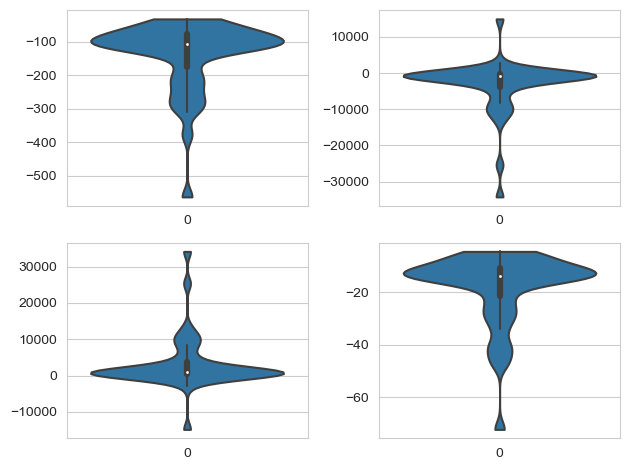

In [68]:
fig, axs = plt.subplots(2,2)
for i in range(4):
    sns.violinplot(data=data_values.iloc[:,i], cut=0, ax=axs[i // 2, i % 2])
plt.tight_layout()
plt.show()

## Feature selection 

The main method we chose to employ here is ANOVA, accompanied with t-test. ANOVA can be applied to assess whether there are significant differences in the feature values across the rows with different 'output'.

For the present case, ANOVA calculates a p-value for each feature which indicates the statistical significance of the observed differences in feature value levels among the groups.

In [69]:
# Calculate p-values using ANOVA
_, p_values_anova = f_oneway(data_values.iloc[:,:-1][data_values['Output'] == 1], data_values.iloc[:,:-1][data_values['Output'] == 0])

# Calculate p-values using t-test (idea is similar to ANOVA, could also be exluded)
_, p_values_ttest = ttest_ind(data_values.iloc[:,:-1][data_values['Output'] == 1], data_values.iloc[:,:-1][data_values['Output'] == 0])

# Combine p-values (if desired)
# Using minimum p-value as a combination method
p_values_combined = np.minimum(p_values_anova, p_values_ttest)
print('p_values:', p_values_combined)
print()

# Sort features based on p-values
sorted_features = np.argsort(p_values_combined)
print('Features in order of statistical significance:\n', data_values.columns[sorted_features])


p_values: [2.78034395e-10 3.80823046e-22 3.66661739e-22 1.97746722e-12
 2.26290229e-22 3.92657279e-22 5.88692595e-12 4.45728838e-11
 1.86248272e-22 1.80488603e-22 2.78548596e-13 1.06313955e-22
 1.94250682e-22 5.64305347e-13]

Features in order of statistical significance:
 Index(['GGAS 2', 'EGB 2', 'EEL 2', 'GSOLV 2', 'GGAS 1', 'EGB 1', 'EEL 1',
       'GSOLV 1', 'ESURF 2', 'TOTAL 2', 'ESURF 1', 'TOTAL 1', 'VDWAALS 2',
       'VDWAALS 1'],
      dtype='object')


In [70]:
print(data_values.columns[sorted_features])
print(sorted_features)

Index(['GGAS 2', 'EGB 2', 'EEL 2', 'GSOLV 2', 'GGAS 1', 'EGB 1', 'EEL 1',
       'GSOLV 1', 'ESURF 2', 'TOTAL 2', 'ESURF 1', 'TOTAL 1', 'VDWAALS 2',
       'VDWAALS 1'],
      dtype='object')
[11  9  8 12  4  2  1  5 10 13  3  6  7  0]


<Figure size 1600x400 with 0 Axes>

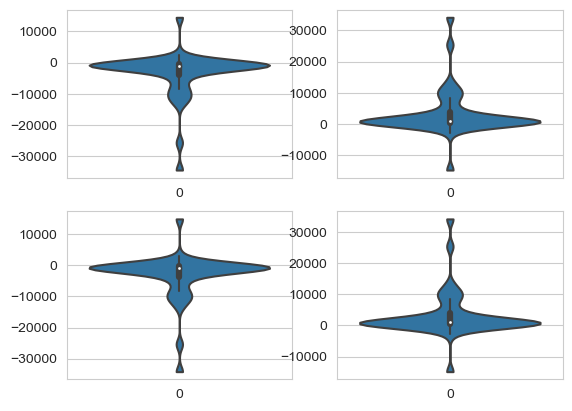

In [71]:
plt.figure(figsize=(16, 4))
fig, axs = plt.subplots(2,2)
for i in range(4):
    sns.violinplot(data=data_values.iloc[:,sorted_features[i]], cut=0, ax=axs[i // 2, i % 2])
plt.tight_layout
plt.show()

c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


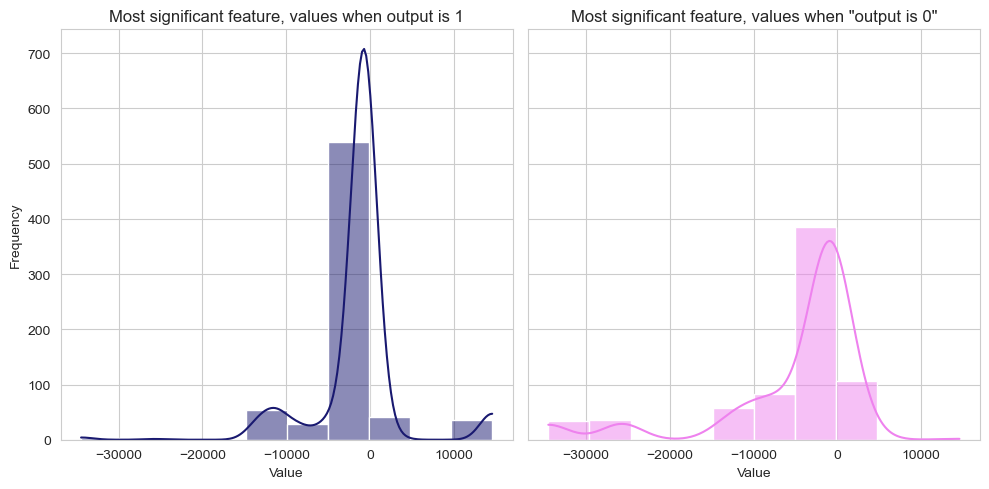

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
sns.set_style("whitegrid")
sns.histplot(data=data_values[data_values['Output'] == 1].iloc[:,sorted_features[0]], ax = axs[0], bins=10, kde=True, color='midnightblue')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Most significant feature, values when output is 1')

sns.histplot(data=data_values[data_values['Output'] == 0].iloc[:, sorted_features[0]], ax = axs[1], bins=10, kde=True, color='violet')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Most significant feature, values when "output is 0"')

plt.tight_layout()
plt.show()

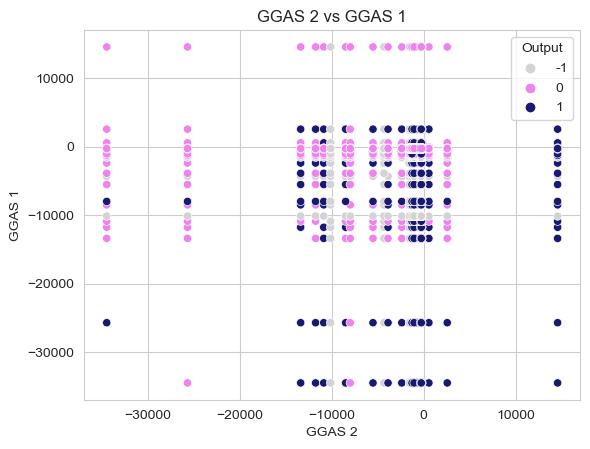

In [84]:
fig = plt.figure()
ax = sns.scatterplot(x=data_values.columns[sorted_features][0],
                y=data_values.columns[sorted_features][4],
                hue='Output',
                data=data_values,
                palette = ['lightgrey', 'violet', 'midnightblue'])
ax.set_title(str(data_values.columns[sorted_features[0]])+' vs '+str(data_values.columns[sorted_features[4]]))
plt.show()

c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\envs\BC_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 640x480 with 0 Axes>

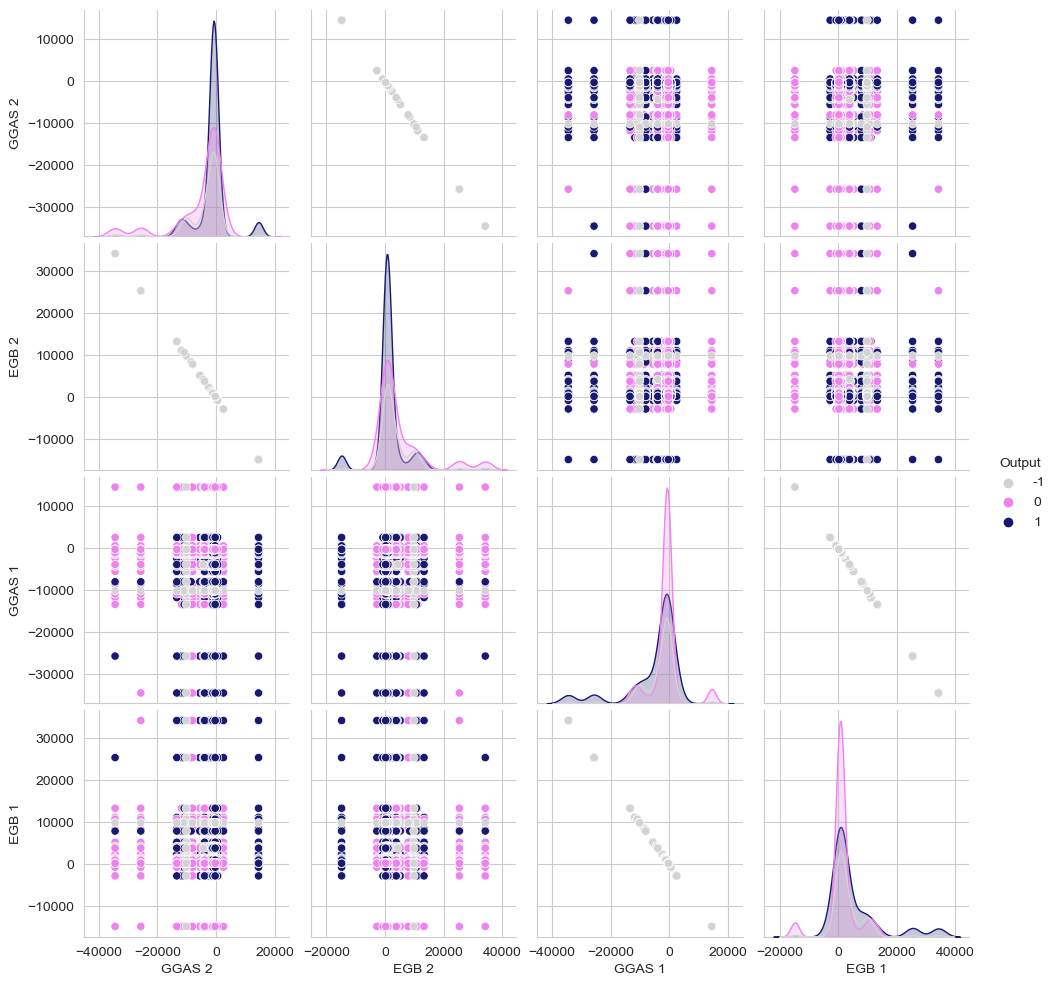

In [83]:
fig = plt.figure()
ax = sns.pairplot(data = data_values,
                  vars=data_values.columns[sorted_features[[0,1,4,5]]],
                  hue='Output',
                  palette = ['lightgrey', 'violet', 'midnightblue'])
plt.show()

In [85]:
df_correlation = data_values.iloc[:,:-1].corr()
df_correlation

,VDWAALS 1,EEL 1,EGB 1,ESURF 1,GGAS 1,GSOLV 1,TOTAL 1,VDWAALS 2,EEL 2,EGB 2,ESURF 2,GGAS 2,GSOLV 2,TOTAL 2
VDWAALS 1,1.000000,0.282140,-0.282902,0.993702,0.295084,-0.281246,0.970422,-0.023810,-0.006718,0.006736,-0.023660,-0.007026,0.006696,-0.023105
EEL 1,0.282140,1.000000,-0.999993,0.359138,0.999909,-0.999993,0.371229,-0.006718,-0.023810,0.023809,-0.008551,-0.023807,0.023809,-0.008839
EGB 1,-0.282902,-0.999993,1.000000,-0.359918,-0.999913,0.999998,-0.371169,0.006736,0.023809,-0.023810,0.008569,0.023807,-0.023809,0.008837
ESURF 1,0.993702,0.359138,-0.359918,1.000000,0.371680,-0.358301,0.970704,-0.023660,-0.008551,0.008569,-0.023810,-0.008850,0.008531,-0.023112
GGAS 1,0.295084,0.999909,-0.999913,0.371680,1.000000,-0.999889,0.383394,-0.007026,-0.023807,0.023807,-0.008850,-0.023810,0.023807,-0.009128
GSOLV 1,-0.281246,-0.999993,0.999998,-0.358301,-0.999889,1.000000,-0.369615,0.006696,0.023809,-0.023809,0.008531,0.023807,-0.023810,0.008800
TOTAL 1,0.970422,0.371229,-0.371169,0.970704,0.383394,-0.369615,1.000000,-0.023105,-0.008839,0.008837,-0.023112,-0.009128,0.008800,-0.023810
VDWAALS 2,-0.023810,-0.006718,0.006736,-0.023660,-0.007026,0.006696,-0.023105,1.000000,0.282140,-0.282902,0.993702,0.295084,-0.281246,0.970422
EEL 2,-0.006718,-0.023810,0.023809,-0.008551,-0.023807,0.023809,-0.008839,0.282140,1.000000,-0.999993,0.359138,0.999909,-0.999993,0.371229
EGB 2,0.006736,0.023809,-0.023810,0.008569,0.023807,-0.023809,0.008837,-0.282902,-0.999993,1.000000,-0.359918,-0.999913,0.999998,-0.371169


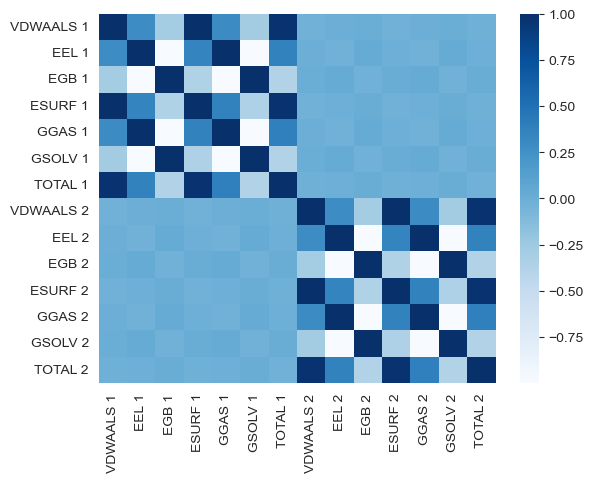

In [86]:
fig = plt.figure()
ax = sns.heatmap(df_correlation, annot=False, cmap = 'Blues')
plt.show()